# core

> Fill in a module description here

In [ ]:
#| default_exp cluster_ejemplo

In [ ]:
#| hide
#| export
from nbdev.showdoc import *
import matplotlib
import sklearn
import random 
import numpy as np
import shapely
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS, KMeans
import matplotlib.pyplot as plt

In [ ]:
#| export
class data_points:
    """Una clase que contiene a los datos"""
    def __init__(self, n, min_x = 0, min_y = 0, max_x= 1, max_y=1, seed= None):
        if seed != None:
            random.seed(seed)
        
        self.Points = np.random.uniform(low= min_x, high= max_x, size=(n, 2));
        self.Points =  [shapely.Point(x[0],x[1]) for x in self.Points]

    
    def get_points(self):
        """Una funcion que para obtener los puntos"""
        return self.Points

    def get_points_arr(self):
        """Una funcion que para obtener los puntos como arrays"""
        array_point = np.asarray(tuple(zip(self.get_X(),self.get_Y())))
        return array_point

    def get_Multypoint(self):
        """Regresa un objeto MultiPoint con los puntos"""
        return shapely.geometry.MultiPoint(self.Points)
    
    def get_X(self):
        """Regresa las coordenadas X"""
        return [x.x for x in self.Points]

    def get_Y(self):
        """Regresa las coordenadas X"""
        return [x.y for x in self.Points]

    def centroid(self):
        """Regresa el centroide de los puntos """
        return shapely.centroid(self.get_Multypoint())
    
    def add_points(self, data_points):
        """Agrega puntos de otra """
        self.Points = self.Points + data_points.Points
        return 
    

In [ ]:
#| hide

datos_simples = data_points(40)

In [ ]:
#| hide

datos_simples.get_points_arr()

array([[0.00220599, 0.9171409 ],
       [0.99624815, 0.89573345],
       [0.61840168, 0.02624809],
       [0.17907977, 0.14898918],
       [0.44830823, 0.7207675 ],
       [0.63927614, 0.09707873],
       [0.66586547, 0.26498348],
       [0.88487348, 0.93082057],
       [0.63796469, 0.58028544],
       [0.47370523, 0.43146079],
       [0.04674624, 0.03584861],
       [0.15823088, 0.17129461],
       [0.01948235, 0.41796448],
       [0.3745256 , 0.5771926 ],
       [0.23850248, 0.76719541],
       [0.90735971, 0.31873271],
       [0.22083045, 0.21243402],
       [0.10859738, 0.04987219],
       [0.54893239, 0.69817052],
       [0.25242311, 0.5113479 ],
       [0.24591323, 0.56795872],
       [0.81200427, 0.89176718],
       [0.66358088, 0.5774182 ],
       [0.82746956, 0.88461645],
       [0.28049172, 0.16170144],
       [0.5543687 , 0.18828877],
       [0.05103172, 0.6427231 ],
       [0.33985998, 0.46843474],
       [0.41583403, 0.24346321],
       [0.21857538, 0.3322505 ],
       [0.

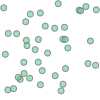

In [ ]:
datos_simples.get_Multypoint()

In [ ]:
#| hide

datos_simples.get_X()

[np.float64(0.0022059857891177925),
 np.float64(0.996248151552961),
 np.float64(0.618401676201697),
 np.float64(0.17907976643013213),
 np.float64(0.44830822556519834),
 np.float64(0.6392761351540015),
 np.float64(0.6658654652177248),
 np.float64(0.884873476770021),
 np.float64(0.637964686883467),
 np.float64(0.4737052285387048),
 np.float64(0.046746240218470514),
 np.float64(0.15823088218738413),
 np.float64(0.019482348552098405),
 np.float64(0.37452560227572373),
 np.float64(0.23850247988539386),
 np.float64(0.9073597111365882),
 np.float64(0.22083045167275617),
 np.float64(0.10859737720926133),
 np.float64(0.548932386887978),
 np.float64(0.2524231060753348),
 np.float64(0.24591322777663327),
 np.float64(0.8120042749034527),
 np.float64(0.6635808790132534),
 np.float64(0.8274695629511463),
 np.float64(0.28049172435403513),
 np.float64(0.554368697874301),
 np.float64(0.05103172340066109),
 np.float64(0.3398599817837489),
 np.float64(0.41583403284673215),
 np.float64(0.2185753789055611)

In [ ]:
#| hide
datos_simples.get_Y()

[np.float64(0.9171408959561209),
 np.float64(0.8957334487120114),
 np.float64(0.02624808645726462),
 np.float64(0.14898917993914418),
 np.float64(0.7207674951964222),
 np.float64(0.09707872946711682),
 np.float64(0.26498347688819446),
 np.float64(0.9308205706122319),
 np.float64(0.580285436013246),
 np.float64(0.4314607899418278),
 np.float64(0.03584861433137243),
 np.float64(0.17129460979162703),
 np.float64(0.4179644844279661),
 np.float64(0.5771926030929402),
 np.float64(0.7671954122942036),
 np.float64(0.31873271377170787),
 np.float64(0.2124340162095747),
 np.float64(0.049872190132925764),
 np.float64(0.6981705249569615),
 np.float64(0.511347899538571),
 np.float64(0.5679587206929562),
 np.float64(0.8917671844961985),
 np.float64(0.5774181963126844),
 np.float64(0.884616453048858),
 np.float64(0.16170143888253075),
 np.float64(0.18828876916510262),
 np.float64(0.6427230950100414),
 np.float64(0.4684347440230011),
 np.float64(0.2434632067393775),
 np.float64(0.3322505025537579),
 n

In [ ]:
#| hide

if len(datos_simples.get_X()) != len(datos_simples.get_Y()):
    raise Exception("Si hay problema la evaluacion ")

In [ ]:
datos_simples = data_points(500, min_x = .75, min_y= .75, max_x= 1, max_y= 1 )

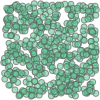

In [ ]:
datos_simples.get_Multypoint()

In [ ]:
#| export
class Clusters:
  """
  Clase para generar los clusters a partir de un objeto de la clase data_points
  
  Esta clase se utiliza para generar los distintos tipos de clusterizaciones, 
  se almacena los datos en una estructura de datos y se le añaden las respectivas 
  classes
  """
    
  def __init__(self, data_points_i, seed=1234):
    if seed != None:
      random.seed(seed)
      self.data_structure =  data_points_i
    
  def KMeans(self, **kwargs):
    """
    Se usa el algoritmo Kmeans para la obtencion de clusters, 
    las clases quedan almacenadas en .data_structure_classes_Kmeans.
    Si se desea obtener el modelo se tiene que añadir 
    (ret_model = True) como parámetro.
    """
    kmeans_c = KMeans(**kwargs)
    classes_val = kmeans_c.fit_predict(self.data_structure.get_points_arr())
    self.data_structure.classes_Kmeans = classes_val
    
    if 'ret_model' in kwargs and kwargs['ret_model']==True :
        return  kmeans_c
        

  def DBSCAN(self, **kwargs):
    """
    Se DBSCAN para la obtencion de clusters, las clases quedan almacenadas
    en .data_structure_classes_DBSCAN. Si se desea obtener el modelo se tiene
    que añadir (ret_model = True) como parámetro.
    """
    db = DBSCAN(**kwargs).fit(self.data_structure.get_points_arr())
    self.data_structure.classes_DBSCAN = db.labels_
    if 'ret_model' in kwargs and kwargs['ret_model']==True :
        return  db
    
    
  def HDBSCAN(self, **kwargs):
    """
    Se HDBSCAN para la obtencion de clusters, las clases quedan almacenadas
    en .data_structure_classes_HDBSCAN. Si se desea obtener el modelo se tiene
    que añadir (ret_model = True) como parámetro.
    """
    hdb = HDBSCAN(**kwargs).fit(self.data_structure.get_points_arr())
    self.data_structure.classes_HDBSCAN = hdb.labels_
    if 'ret_model' in kwargs and kwargs['ret_model']==True : 
      return  hdb
        

  def OPTICS(self, **kwargs):
    """
    Se usa el algoritmo OPTICS para la obtencion de clusters, 
    las clases quedan almacenadas en .data_structure_classes_OPTICS.
    Si se desea obtener el modelo se tiene que añadir 
    (ret_model = True) como parámetro.
    """
    optics=  OPTICS(**kwargs).fit(self.data_structure.get_points_arr())
    self.data_structure.classes_OPTICS = optics.labels_
    
    if 'ret_model' in kwargs and kwargs['ret_model']==True :
        return  optics

In [ ]:
#| hide
cluster_all  = Clusters(datos_simples)

In [ ]:
#| hide
cluster_all.KMeans()

In [ ]:
#| hide
cluster_all.DBSCAN()

In [ ]:
#| hide
cluster_all.HDBSCAN()

In [ ]:
#| hide
cluster_all.OPTICS()

In [ ]:

cluster_all.data_structure.classes_DBSCAN

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
cluster_all.data_structure.classes_Kmeans

array([7, 1, 6, 7, 3, 1, 3, 3, 1, 2, 3, 6, 6, 0, 3, 3, 6, 2, 3, 6, 6, 0,
       7, 1, 4, 3, 3, 6, 6, 7, 2, 5, 7, 0, 4, 3, 7, 3, 3, 3, 0, 5, 0, 6,
       1, 5, 5, 1, 5, 2, 6, 2, 1, 1, 4, 7, 0, 6, 4, 3, 0, 1, 6, 6, 0, 1,
       6, 0, 5, 0, 3, 4, 2, 5, 2, 1, 5, 2, 3, 3, 4, 6, 3, 5, 5, 7, 0, 6,
       2, 3, 7, 0, 3, 3, 6, 2, 7, 5, 0, 4, 7, 6, 6, 7, 6, 7, 2, 0, 0, 0,
       5, 4, 1, 0, 5, 7, 7, 1, 5, 7, 7, 4, 5, 6, 0, 0, 0, 1, 3, 0, 4, 6,
       1, 3, 1, 7, 0, 2, 6, 4, 0, 2, 7, 4, 7, 6, 5, 3, 3, 6, 2, 5, 4, 6,
       1, 5, 1, 0, 4, 3, 1, 5, 2, 4, 4, 7, 5, 4, 7, 0, 7, 4, 0, 6, 4, 0,
       0, 4, 0, 2, 2, 5, 3, 6, 2, 1, 4, 4, 0, 3, 6, 6, 6, 4, 0, 7, 6, 7,
       0, 2, 3, 4, 2, 4, 4, 0, 5, 1, 3, 3, 5, 6, 5, 7, 5, 2, 0, 0, 6, 4,
       6, 6, 6, 5, 6, 4, 1, 6, 6, 0, 5, 6, 1, 4, 7, 1, 0, 4, 2, 5, 1, 6,
       6, 4, 4, 3, 1, 6, 4, 4, 1, 0, 4, 3, 0, 3, 0, 6, 6, 4, 2, 2, 2, 7,
       1, 3, 2, 4, 6, 0, 0, 7, 3, 3, 4, 5, 0, 3, 5, 3, 3, 6, 4, 1, 1, 1,
       6, 4, 0, 5, 4, 2, 5, 1, 6, 3, 5, 6, 6, 4, 1,

In [ ]:
cluster_all.data_structure.classes_OPTICS

array([-1, -1, 11, -1,  5, 16, -1, -1, 16,  3, -1, 11, 11, -1, -1, 28, 30,
       -1, 28, -1, 13, -1, -1, 17, -1, -1, -1, -1, -1,  0,  2, -1, -1, -1,
       22, -1, 29, -1, 28, -1,  9, -1, 18, -1, 25, -1, -1, -1, -1, 23, 11,
       23, 25, 16, -1, 26, -1, -1, -1, -1, 18, -1, -1, -1,  8, 17, 13, -1,
       21,  7, -1, -1,  1, -1,  1, -1, -1, 24,  4,  4, 19, 30,  6, -1, -1,
       26, -1, -1, 23, 28, -1, -1, -1, -1, 30,  1, -1, -1,  7, 19, -1, -1,
       12, 26, -1, -1, 23, 15,  9, -1, -1, 20, -1,  7, -1, 29, -1, -1, -1,
        0, -1, -1, -1, 11,  8, -1, -1, -1, -1, 15, -1, 11, -1,  5, -1,  0,
       -1,  3, -1, 19, -1, -1, -1, -1, -1, -1, 21,  5, -1, 12, 23, 21, -1,
       -1, -1, -1, -1,  7, -1,  6, -1, -1,  3, -1, -1, -1, -1, 19, -1, -1,
        0, 20, 15, 12, -1,  9, -1, -1, -1, 24, -1, -1, -1, -1, 24, -1, 20,
       22, 15, -1, 14, 30, 30, 19,  9, -1, -1, -1, -1,  1, 28, 20, 24, -1,
       -1, 15, -1, -1,  6,  4, 21, -1, -1, 26, -1,  1, -1,  8, -1, 22, 10,
       -1, 13, -1, -1, 19

In [ ]:

datos_simples_3 = data_points(500, min_x = 0.6, min_y= 0.6, max_x= 1.0, max_y= 1.0 )
datos_simples_2 = data_points(500, min_x = 0.0, min_y= 0.6, max_x= 0.4, max_y= 1.0 )
datos_simples_1 = data_points(500, min_x = 0.6, min_y= 0.0, max_x= 1.0, max_y= 0.4 )
datos_simples_0 = data_points(500, min_x = 0.0, min_y= 0.0, max_x= 0.4, max_y= 0.4 )

In [ ]:
datos_simples_0.add_points(datos_simples_1)
datos_simples_0.add_points(datos_simples_2)
datos_simples_0.add_points(datos_simples_3)

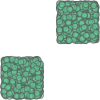

In [ ]:
datos_simples_0.get_Multypoint()

In [ ]:
cluster_all  = Clusters(datos_simples_0)

In [ ]:
cluster_all.OPTICS()
cluster_all.HDBSCAN()
cluster_all.DBSCAN(eps=0.1, min_samples=10)
cluster_all.KMeans()

<matplotlib.collections.PathCollection>

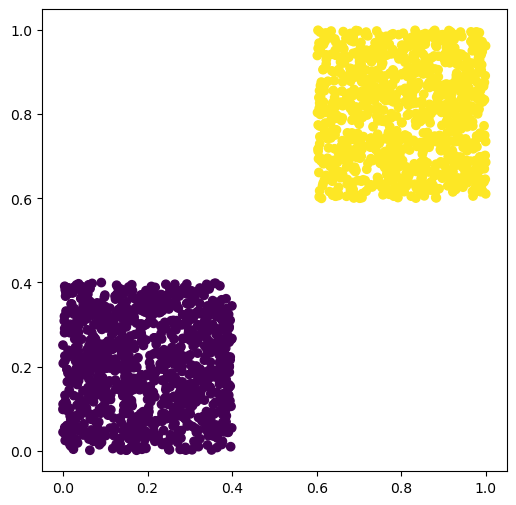

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(6,6))
color_map = matplotlib.colormaps['viridis'].resampled(len(np.unique(cluster_all.data_structure.classes_DBSCAN)))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(np.unique(cluster_all.data_structure.classes_DBSCAN)))]
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_DBSCAN
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

<matplotlib.collections.PathCollection>

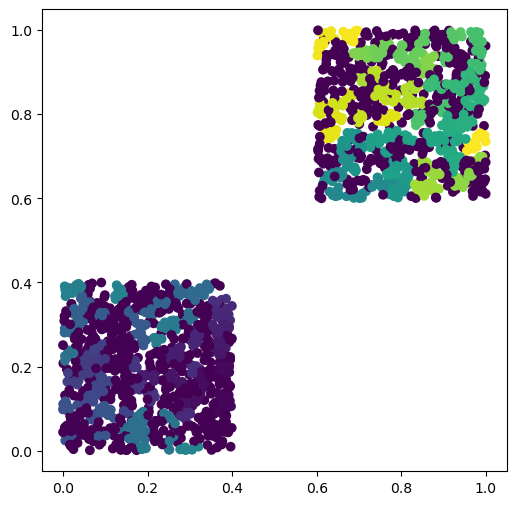

In [ ]:


fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_OPTICS
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )
     


<matplotlib.collections.PathCollection>

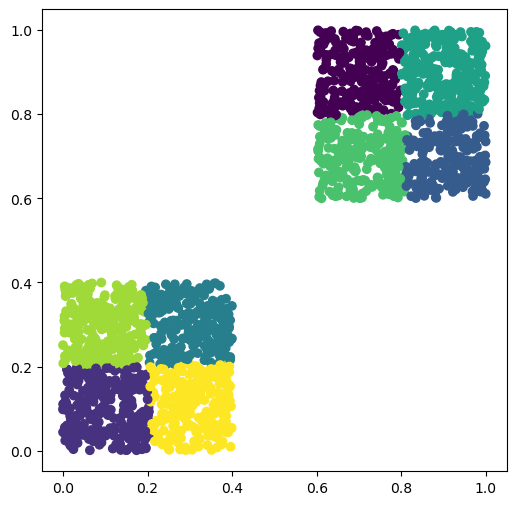

In [ ]:


fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_Kmeans
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )
     


<matplotlib.collections.PathCollection>

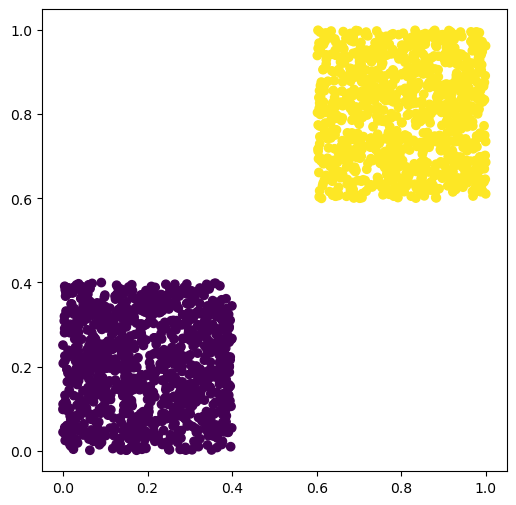

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_HDBSCAN
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()